In [1]:
import pandas as pd
import numpy as np

## Timestamp Object
Time stamps reference particular moments in time (e.g., Oct 24th, 2022 at 7:00pm)

### Creating Timestamp objects

In [4]:
# creating a timestamp
pd.Timestamp('2023/5/23')

Timestamp('2023-05-23 00:00:00')

In [7]:
# variations
pd.Timestamp('2023-5-23')
pd.Timestamp('2023, 5, 23')

Timestamp('2023-05-23 00:00:00')

In [8]:
# only year
pd.Timestamp('2023')

Timestamp('2023-01-01 00:00:00')

In [10]:
# using text
pd.Timestamp('23rd may 2023')

Timestamp('2023-05-23 00:00:00')

In [11]:
# providing time also
pd.Timestamp('23rd May 2023 12:47PM')

Timestamp('2023-05-23 12:47:00')

In [17]:
import datetime as dt

dt.datetime(2023,5,23,12,48)
x= pd.Timestamp(dt.datetime(2023,5,23,12,48))
x

Timestamp('2023-05-23 12:48:00')

In [23]:
# fetching attributes
x.year
x.month
x.day
x.hour
x.minute
x.second

0

In [24]:
# why separate objects to handle data and time when python already has datetime functionality?

- syntax wise datetime is very convenient
- But the performance takes a hit while working with huge data. List vs Numpy Array
- The weaknesses of Python's datetime format inspired the NumPy team to add a set of native time series data type to NumPy.
- The datetime64 dtype encodes dates as 64-bit integers, and thus allows arrays of dates to be represented very compactly.

In [25]:
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [26]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

- Because of the uniform type in NumPy datetime64 arrays, this type of operation can be accomplished much more quickly than if we were working directly with Python's datetime objects, especially as arrays get large 

- Pandas Timestamp object combines the ease-of-use of python datetime with the efficient storage and vectorized interface of numpy.datetime64

- From a group of these Timestamp objects, Pandas can construct a DatetimeIndex that can be used to index data in a Series or DataFrame

## DatetimeIndex Object

A collection of pandas timestamp

In [28]:
# from string
pd.DatetimeIndex(['2023/1/1','2023/1/2','2023/1/3'])

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03'], dtype='datetime64[ns]', freq=None)

In [29]:
# using python datetime object
pd.DatetimeIndex([dt.datetime(2023,1,1),dt.datetime(2023,1,2),dt.datetime(2023,1,3)])

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03'], dtype='datetime64[ns]', freq=None)

In [31]:
# using pd.timestamps
dt_index = pd.DatetimeIndex([pd.Timestamp('2023, 1, 1'),pd.Timestamp('2023, 1, 2'),pd.Timestamp('2023, 1, 3')])
dt_index

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03'], dtype='datetime64[ns]', freq=None)

In [32]:
# using DatetimeIndex as series index
pd.Series([1,2,3],index=dt_index)

2023-01-01    1
2023-01-02    2
2023-01-03    3
dtype: int64

## date_range function

In [38]:
# generate daily dates in given range (D -> default, 2D -> alternate days and so on)
pd.date_range(start='2023/1/1',end='2023/2/28',freq='D')

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
               '2023-01-13', '2023-01-14', '2023-01-15', '2023-01-16',
               '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20',
               '2023-01-21', '2023-01-22', '2023-01-23', '2023-01-24',
               '2023-01-25', '2023-01-26', '2023-01-27', '2023-01-28',
               '2023-01-29', '2023-01-30', '2023-01-31', '2023-02-01',
               '2023-02-02', '2023-02-03', '2023-02-04', '2023-02-05',
               '2023-02-06', '2023-02-07', '2023-02-08', '2023-02-09',
               '2023-02-10', '2023-02-11', '2023-02-12', '2023-02-13',
               '2023-02-14', '2023-02-15', '2023-02-16', '2023-02-17',
               '2023-02-18', '2023-02-19', '2023-02-20', '2023-02-21',
               '2023-02-22', '2023-02-23', '2023-02-24', '2023-02-25',
      

In [39]:
# alternate days in given range
pd.date_range(start='2023/1/1',end='2023/2/28',freq='2D')

DatetimeIndex(['2023-01-01', '2023-01-03', '2023-01-05', '2023-01-07',
               '2023-01-09', '2023-01-11', '2023-01-13', '2023-01-15',
               '2023-01-17', '2023-01-19', '2023-01-21', '2023-01-23',
               '2023-01-25', '2023-01-27', '2023-01-29', '2023-01-31',
               '2023-02-02', '2023-02-04', '2023-02-06', '2023-02-08',
               '2023-02-10', '2023-02-12', '2023-02-14', '2023-02-16',
               '2023-02-18', '2023-02-20', '2023-02-22', '2023-02-24',
               '2023-02-26', '2023-02-28'],
              dtype='datetime64[ns]', freq='2D')

In [41]:
# B -> business days
pd.date_range(start='2023/1/1',end='2023/2/28',freq='B')

DatetimeIndex(['2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05',
               '2023-01-06', '2023-01-09', '2023-01-10', '2023-01-11',
               '2023-01-12', '2023-01-13', '2023-01-16', '2023-01-17',
               '2023-01-18', '2023-01-19', '2023-01-20', '2023-01-23',
               '2023-01-24', '2023-01-25', '2023-01-26', '2023-01-27',
               '2023-01-30', '2023-01-31', '2023-02-01', '2023-02-02',
               '2023-02-03', '2023-02-06', '2023-02-07', '2023-02-08',
               '2023-02-09', '2023-02-10', '2023-02-13', '2023-02-14',
               '2023-02-15', '2023-02-16', '2023-02-17', '2023-02-20',
               '2023-02-21', '2023-02-22', '2023-02-23', '2023-02-24',
               '2023-02-27', '2023-02-28'],
              dtype='datetime64[ns]', freq='B')

In [45]:
# W -> one week per day
pd.date_range(start='2023/1/1',end='2023/2/28',freq='W-THU')

DatetimeIndex(['2023-01-05', '2023-01-12', '2023-01-19', '2023-01-26',
               '2023-02-02', '2023-02-09', '2023-02-16', '2023-02-23'],
              dtype='datetime64[ns]', freq='W-THU')

In [46]:
# H -> hourly data (factor) (h,2H,3H,4H...)
pd.date_range(start='2023/1/1',end='2023/2/28',freq='H')

DatetimeIndex(['2023-01-01 00:00:00', '2023-01-01 01:00:00',
               '2023-01-01 02:00:00', '2023-01-01 03:00:00',
               '2023-01-01 04:00:00', '2023-01-01 05:00:00',
               '2023-01-01 06:00:00', '2023-01-01 07:00:00',
               '2023-01-01 08:00:00', '2023-01-01 09:00:00',
               ...
               '2023-02-27 15:00:00', '2023-02-27 16:00:00',
               '2023-02-27 17:00:00', '2023-02-27 18:00:00',
               '2023-02-27 19:00:00', '2023-02-27 20:00:00',
               '2023-02-27 21:00:00', '2023-02-27 22:00:00',
               '2023-02-27 23:00:00', '2023-02-28 00:00:00'],
              dtype='datetime64[ns]', length=1393, freq='H')

In [47]:
# MS -> month start
pd.date_range(start='2023/1/1',end='2023/2/28',freq='MS')

DatetimeIndex(['2023-01-01', '2023-02-01'], dtype='datetime64[ns]', freq='MS')

In [49]:
# A -> year end
pd.date_range(start='2023/1/5',end='2030/2/28',freq='A')

DatetimeIndex(['2023-12-31', '2024-12-31', '2025-12-31', '2026-12-31',
               '2027-12-31', '2028-12-31', '2029-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [52]:
# using periods (number of results)
pd.date_range(start='2023/1/1',periods=25,freq='D')

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
               '2023-01-13', '2023-01-14', '2023-01-15', '2023-01-16',
               '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20',
               '2023-01-21', '2023-01-22', '2023-01-23', '2023-01-24',
               '2023-01-25'],
              dtype='datetime64[ns]', freq='D')

## to_datetime function
converts an existing object to pandas timestamp/datetimeindex object

In [61]:
# simple series example
s = pd.Series(['2023/1/1','2022/1/1','2021/1/1'])
pd.to_datetime(s).dt.year
pd.to_datetime(s).dt.month
pd.to_datetime(s).dt.day
pd.to_datetime(s).dt.day_name()

0      Sunday
1    Saturday
2      Friday
dtype: object

In [64]:
# with errors
s = pd.Series(['2023/1/1','2022/1/1','2021/120/1'])
pd.to_datetime(s,errors='coerce')

0   2023-01-01
1   2022-01-01
2          NaT
dtype: datetime64[ns]

In [65]:
df = pd.read_csv('Databases/expense_data.csv')
df.shape

(277, 11)

In [66]:
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            277 non-null    object 
 1   Account         277 non-null    object 
 2   Category        277 non-null    object 
 3   Subcategory     0 non-null      float64
 4   Note            273 non-null    object 
 5   INR             277 non-null    float64
 6   Income/Expense  277 non-null    object 
 7   Note.1          0 non-null      float64
 8   Amount          277 non-null    float64
 9   Currency        277 non-null    object 
 10  Account.1       277 non-null    float64
dtypes: float64(5), object(6)
memory usage: 23.9+ KB


In [72]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            277 non-null    datetime64[ns]
 1   Account         277 non-null    object        
 2   Category        277 non-null    object        
 3   Subcategory     0 non-null      float64       
 4   Note            273 non-null    object        
 5   INR             277 non-null    float64       
 6   Income/Expense  277 non-null    object        
 7   Note.1          0 non-null      float64       
 8   Amount          277 non-null    float64       
 9   Currency        277 non-null    object        
 10  Account.1       277 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 23.9+ KB


## dt accessor
Accessor object for datetime like properties of the Series value

In [75]:
df['Date'].dt.year
df['Date'].dt.month_name()

0         March
1         March
2         March
3         March
4         March
         ...   
272    November
273    November
274    November
275    November
276    November
Name: Date, Length: 277, dtype: object

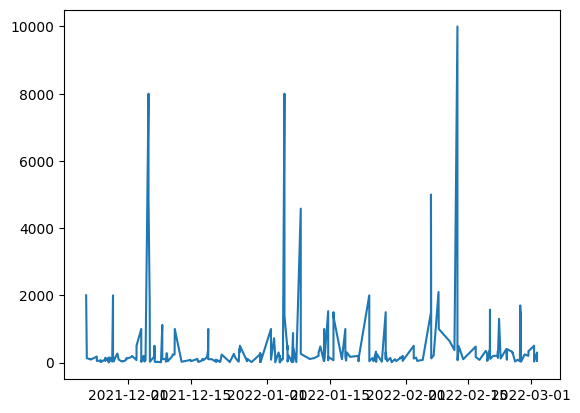

In [76]:
# plot graph
import matplotlib.pyplot as plt
plt.plot(df['Date'],df['INR'])

In [77]:
# day name wise bar chart/month wise bar chart

df['day_name'] = df['Date'].dt.day_name()

<Axes: xlabel='day_name'>

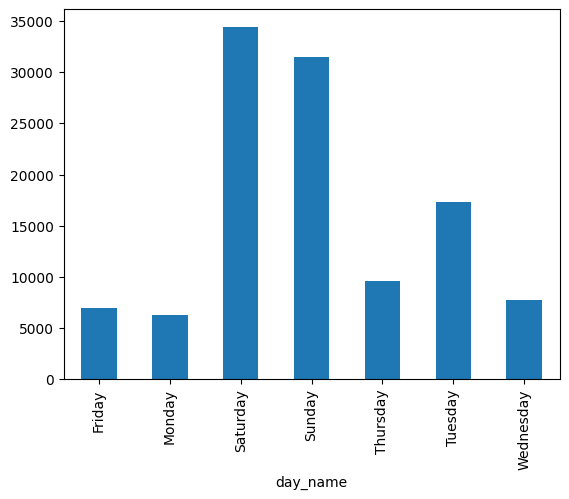

In [79]:
df.groupby('day_name')['INR'].sum().plot(kind='bar')

<Axes: xlabel='month_name'>

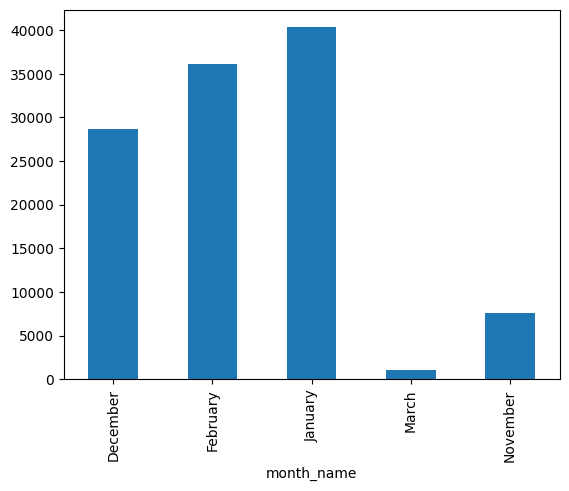

In [80]:
df['month_name'] = df['Date'].dt.month_name()
df.groupby('month_name')['INR'].sum().plot(kind='bar')